# You Tube Trending Videos Analysis

The dataset was gotten from [kaggle](https://www.kaggle.com/rsrishav/youtube-trending-video-dataset)

### Declaring important module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
import datetime
import wordcloud
from collections import Counter
import json

In [2]:
# In this case the Canada is analysed
data = pd.read_csv("dataset/youtube_trending_video_dataset/CA_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/US_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/FR_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/IN_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/BR_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/DE_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/BR_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/JP_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/GB_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/MX_youtube_trending_data.csv")
#data = pd.read_csv("dataset/youtube_trending_video_dataset/RU_youtube_trending_data.csv")
data.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


### Configurations to improve visualizations
References:
* [```pd.options.display```](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

* [```plt.rc```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html)

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

pd.options.display.float_format = '{:.2f}'.format

sns.set(style="ticks")
plt.rc('figure', figsize = (8, 5), dpi=100)
plt.rc('axes', labelpad =20, facecolor = "#ffffff", linewidth=0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

### Data Exploration

The description column has some null values. These are rows with null description value. Perform data wrangling and remove those null values. In this case an empty string would me used to replace each null value in the ```Description``` column.

In [4]:
# check for general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98944 entries, 0 to 98943
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           98944 non-null  object
 1   title              98944 non-null  object
 2   publishedAt        98944 non-null  object
 3   channelId          98944 non-null  object
 4   channelTitle       98944 non-null  object
 5   categoryId         98944 non-null  int64 
 6   trending_date      98944 non-null  object
 7   tags               98944 non-null  object
 8   view_count         98944 non-null  int64 
 9   likes              98944 non-null  int64 
 10  dislikes           98944 non-null  int64 
 11  comment_count      98944 non-null  int64 
 12  thumbnail_link     98944 non-null  object
 13  comments_disabled  98944 non-null  bool  
 14  ratings_disabled   98944 non-null  bool  
 15  description        96994 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [5]:
# check columns for null values
data.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1950
dtype: int64

In [6]:
# fills areas with null values with empty string
data["description"] = data["description"].fillna(value="")

In [7]:
data.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,98944.00,98944.00,98944.00,98944.00,98944.00
mean,19.37,2721839.04,150802.20,3170.59,12628.33
std,6.64,7062410.28,416643.65,13263.13,96815.38
min,1.00,0.00,0.00,0.00,0.00
25%,17.00,478344.50,19606.75,319.00,1360.00
50%,22.00,1021743.00,52051.00,781.00,3287.50
75%,24.00,2357819.00,133517.25,2118.00,8212.00
max,29.00,264407389.00,16021548.00,879357.00,6738536.00


- **MEAN -** Add all the numbers then divide by the amount of numbers<br>
        6, 3, 9, 1, 8, 3
        6 + 3 + 9 + 1 + 8 + 3
        30 ÷ 6 = 5 hence mean
- **MEDIAN -** Order the set of numbers, the median is the middle number(s)<br>
        6, 3, 9, 1, 8, 3
        1, 3, 3, 6, 8, 9
             (3, 6) hence median
- **MODE -** The most common number
        6, 3, 9, 1, 8, 3
           ^           ^
           3 has count of 2 hence mode

In [8]:
# print statistics as float with 2 decimal places
print( "The average amount of views is %.2f and median is %.2f" % (data["view_count"].mean(), data["view_count"].median()))
print( "The average mount of likes is %.2f and median is %.2f" % (data["likes"].mean(), data["likes"].median()))
print( "The average amount of dislikes is %.2f and median is %.2f" % (data["dislikes"].mean(), data["dislikes"].median()))
print( "The average amount of comments is %.2f and median is %.2f" % (data["comment_count"].mean(), data["comment_count"].median()))

The average amount of views is 2721839.04 and median is 1021743.00
The average mount of likes is 150802.20 and median is 52051.00
The average amount of dislikes is 3170.59 and median is 781.00
The average amount of comments is 12628.33 and median is 3287.50


The statistics indicates that the numbers for average views, likes, dislikes, and comments are all greater than those of those in 50% percentile of the distribution(i.e the median).

### Data Visualization

In [9]:
data["title"].head(1)

0    Diljit Dosanjh: CLASH (Official) Music Video |...
Name: title, dtype: object

Find out which titles in the column ```title``` have at least a single word in all ***UPPERCASE***

Reference
* [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)
* [how to pandas.merge](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html)

In [10]:
def contains_capitalized_word(s):
    for w in s.split():  #split the each individual word in the title string
        if w.isupper():  #check if the whole word is in uppercase
            return True  #return True if so
    return False  #If no word in the entire title string is all uppercase return false


#create a column that
data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)

print(data["title"].head(5), "\n")

print(data["contains_capitalized"].head(5))

0    Diljit Dosanjh: CLASH (Official) Music Video |...
1    I left youtube for a month and THIS is what ha...
2    Apex Legends | Stories from the Outlands – “Th...
3                   I ASKED HER TO BE MY GIRLFRIEND...
4    Ultimate DIY Home Movie Theater for The LaBran...
Name: title, dtype: object 

0     True
1     True
2    False
3     True
4     True
Name: contains_capitalized, dtype: bool


In [11]:
#Count the number categorical data
value_counts = data["contains_capitalized"].value_counts()
print(value_counts, "\n")

#Puts the census of the True and False in a dictionary
print(value_counts.to_dict())

True     52475
False    46469
Name: contains_capitalized, dtype: int64 

{True: 52475, False: 46469}


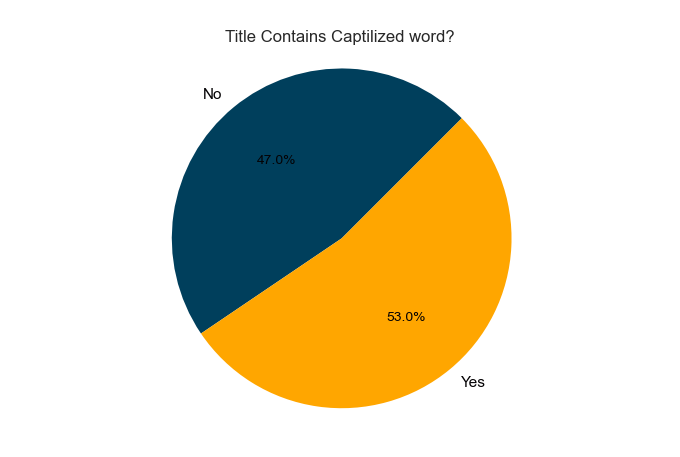

In [12]:
#plot the ratio on  pie graph
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], 
            value_counts[True]], 
           labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], 
           textprops={'color': '#040204'},
           autopct='%1.1f%%',
           startangle=45)

_ = ax.axis('equal')
_ = ax.set_title('Title Contains Captilized word?')

/Users/adunifekizitookoye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


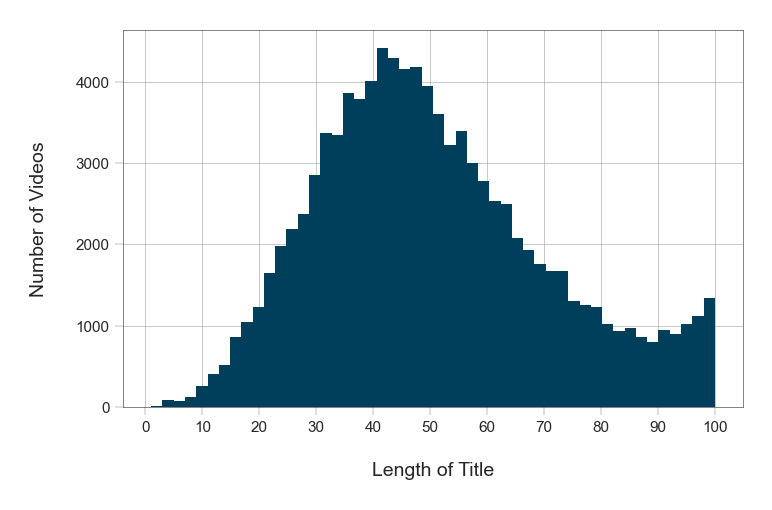

In [13]:
#find length of each title
data["title_length"] = data["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(data["title_length"], 
                 kde = False, 
                 rug = False, 
                 color = PLOT_COLORS[4], 
                 hist_kws = {'alpha': 1}, 
                 ax=ax)
_ = ax.set(xlabel = "Length of Title", ylabel = "Number of Videos", xticks=range(0, 110, 10))

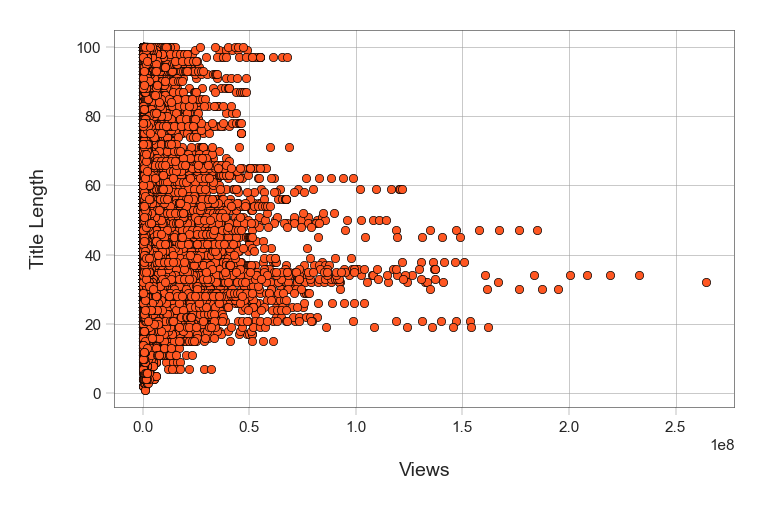

In [14]:
fig, ax = plt.subplots()
_ = ax.scatter(x=data['view_count'], 
               y=data['title_length'], 
               color=PLOT_COLORS[2], 
               edgecolors="#000000", 
               linewidths=0.5)

_ = ax.set(xlabel="Views", ylabel="Title Length")

### Correlation

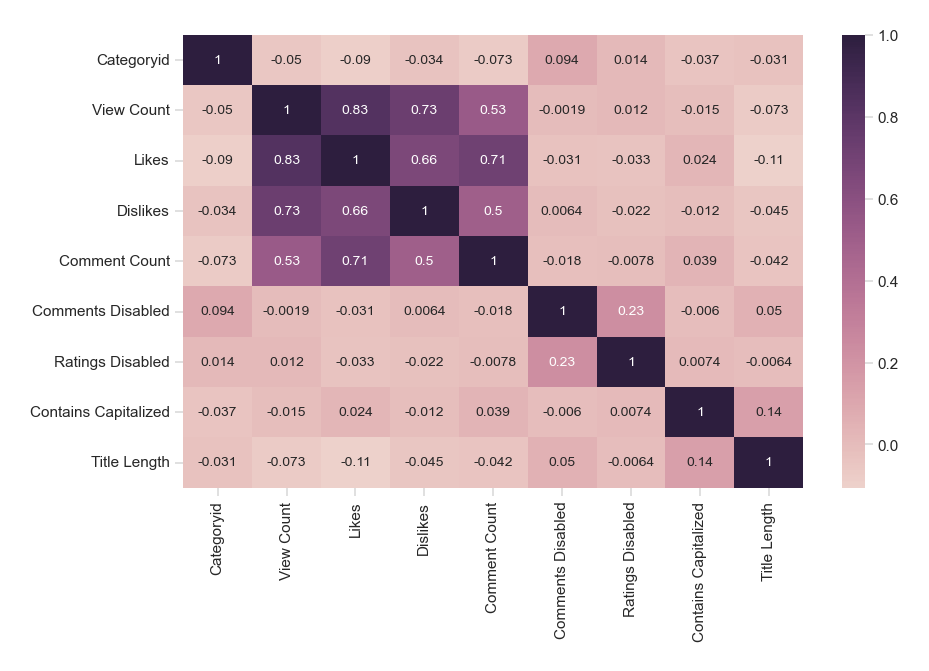

In [15]:
h_labels = [x.replace('_', ' ').title() for x in list(data.select_dtypes(include = ['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data.corr(), 
                annot=True, 
                xticklabels=h_labels, 
                yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), 
                ax=ax)

The correlation map and correlation table indicates high levels of positive correlation amongst ```View Counts```, ```Likes```, ```Dislike```, and ```Comment Count```

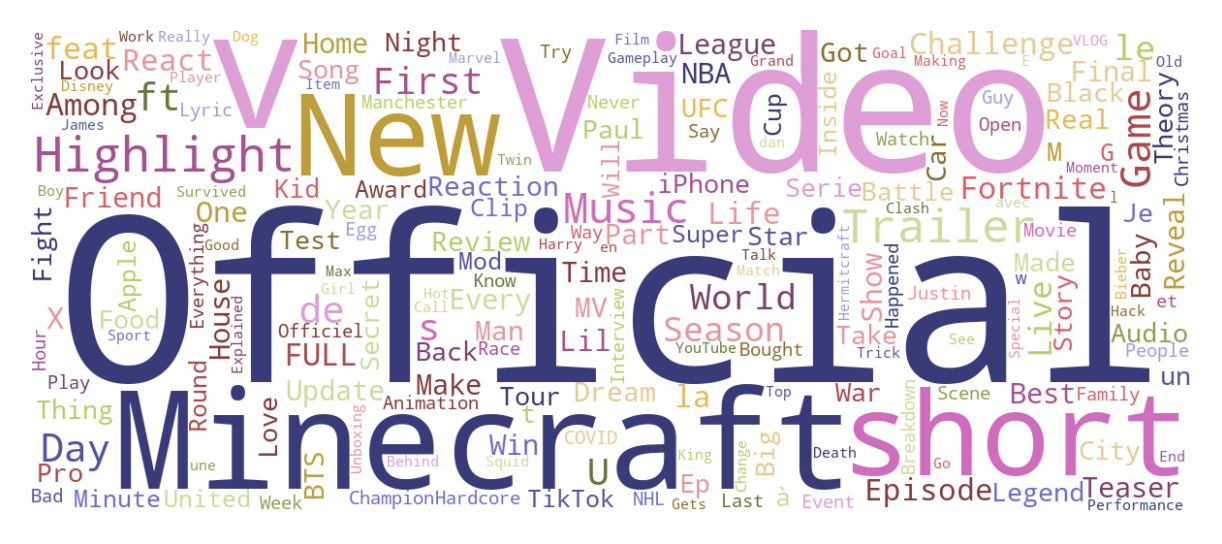

In [16]:
#split the titles into words and store in a list
title_words = list(data["title"].apply(lambda x: x.split()))

title_words = [x for y in title_words for x in y]

wc = wordcloud.WordCloud(width=1200, 
                         height=500, 
                         collocations=False, 
                         background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))

plt.figure(figsize = (15, 10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")